## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import numba

Create Dataset for Timing

In [2]:
timing_dgms = np.empty([1000,8], dtype=object)
for j in range(0,1000):
    three_dgms = []
    six_dgms = []
    ten_dgms = []
    twenty_dgms = []
    forty_dgms = []
    eighty_dgms = []
    threehundred_dgms = []
    random_dgms = []
    point = [0, 20]
    three_dgms.append(point)
    six_dgms.append(point)
    ten_dgms.append(point)
    twenty_dgms.append(point)
    forty_dgms.append(point)
    eighty_dgms.append(point)
    threehundred_dgms.append(point)
    random_dgms.append(point)
    for i in range(0,2):
        birth = np.random.randint(0, 20, size=1)
        death = np.random.randint(birth, 20, size=1)
        point = [birth[0], death[0]]
        three_dgms.append(point)
    for i in range(0,5):
        birth = np.random.randint(0, 20, size=1)
        death = np.random.randint(birth, 20, size=1)
        point = [birth[0], death[0]]
        six_dgms.append(point)
    for i in range(0,9):
        birth = np.random.randint(0, 20, size=1)
        death = np.random.randint(birth, 20, size=1)
        point = [birth[0], death[0]]
        ten_dgms.append(point)
    for i in range(0,19):
        birth = np.random.randint(0, 20, size=1)
        death = np.random.randint(birth, 20, size=1)
        point = [birth[0], death[0]]
        twenty_dgms.append(point)
    for i in range(0,39):
        birth = np.random.randint(0, 20, size=1)
        death = np.random.randint(birth, 20, size=1)
        point = [birth[0], death[0]]
        forty_dgms.append(point)
    for i in range(0,79):
        birth = np.random.randint(0, 20, size=1)
        death = np.random.randint(birth, 20, size=1)
        point = [birth[0], death[0]]
        eighty_dgms.append(point)
    for i in range(0,299):
        birth = np.random.randint(0, 20, size=1)
        death = np.random.randint(birth, 20, size=1)
        point = [birth[0], death[0]]
        threehundred_dgms.append(point)
    r = np.random.randint(low=2, high=100, size=1)
    for i in range(0,r[0]):
        birth = np.random.randint(0, 20, size=1)
        death = np.random.randint(birth, 20, size=1)
        point = [birth[0], death[0]]
        random_dgms.append(point)
    timing_dgms[j,0]=three_dgms
    timing_dgms[j,1]=six_dgms
    timing_dgms[j,2]=ten_dgms
    timing_dgms[j,3]=twenty_dgms
    timing_dgms[j,4]=forty_dgms
    timing_dgms[j,5]=eighty_dgms
    timing_dgms[j,6]=threehundred_dgms
    timing_dgms[j,7]=random_dgms
timing_dgms = pd.DataFrame(timing_dgms)
timing_dgms.columns = ['Length 3 dgms', 'Length 6 dgms', 'Length 10 dgms', 'Length 20 dgms', 'Length 40 dgms', 'Length 80 dgms', 'Length 300 dgms','Random Diagram Size']
timing_dgms

,Length 3 dgms,Length 6 dgms,Length 10 dgms,Length 20 dgms,Length 40 dgms,Length 80 dgms,Length 300 dgms,Random Diagram Size
0,"[[0, 20], [19, 19], [11, 16]]","[[0, 20], [11, 13], [1, 19], [8, 11], [7, 15],...","[[0, 20], [13, 16], [7, 9], [11, 11], [16, 16]...","[[0, 20], [16, 16], [11, 18], [10, 19], [7, 13...","[[0, 20], [13, 16], [14, 15], [12, 17], [15, 1...","[[0, 20], [4, 14], [14, 18], [12, 18], [1, 7],...","[[0, 20], [9, 11], [8, 14], [18, 18], [5, 18],...","[[0, 20], [13, 19], [11, 18], [11, 18], [13, 1..."
1,"[[0, 20], [3, 17], [10, 14]]","[[0, 20], [15, 17], [4, 14], [8, 9], [10, 15],...","[[0, 20], [10, 11], [18, 18], [18, 18], [17, 1...","[[0, 20], [8, 10], [14, 19], [1, 8], [0, 1], [...","[[0, 20], [8, 16], [5, 19], [18, 19], [8, 9], ...","[[0, 20], [6, 15], [17, 19], [16, 19], [9, 17]...","[[0, 20], [14, 16], [4, 15], [13, 19], [11, 15...","[[0, 20], [1, 18], [14, 17], [18, 18], [17, 19..."
2,"[[0, 20], [4, 13], [12, 19]]","[[0, 20], [3, 14], [17, 18], [14, 14], [1, 17]...","[[0, 20], [9, 10], [1, 15], [9, 12], [6, 13], ...","[[0, 20], [4, 15], [4, 12], [4, 11], [0, 10], ...","[[0, 20], [7, 13], [2, 7], [19, 19], [4, 13], ...","[[0, 20], [8, 12], [3, 10], [5, 8], [12, 13], ...","[[0, 20], [0, 15], [16, 17], [17, 17], [14, 15...","[[0, 20], [17, 17], [10, 11], [9, 12], [9, 18]..."
3,"[[0, 20], [3, 4], [0, 10]]","[[0, 20], [4, 8], [13, 14], [12, 14], [7, 18],...","[[0, 20], [7, 13], [2, 18], [18, 19], [8, 14],...","[[0, 20], [13, 17], [6, 7], [7, 13], [8, 11], ...","[[0, 20], [13, 14], [0, 18], [1, 19], [17, 19]...","[[0, 20], [12, 18], [19, 19], [2, 9], [15, 16]...","[[0, 20], [8, 19], [3, 9], [14, 16], [11, 19],...","[[0, 20], [17, 17], [16, 18], [9, 18], [10, 13..."
4,"[[0, 20], [6, 7], [19, 19]]","[[0, 20], [15, 16], [6, 17], [1, 18], [6, 10],...","[[0, 20], [7, 19], [2, 19], [9, 12], [13, 19],...","[[0, 20], [0, 9], [14, 17], [6, 13], [3, 16], ...","[[0, 20], [12, 18], [15, 15], [0, 3], [5, 6], ...","[[0, 20], [4, 19], [10, 13], [0, 9], [8, 19], ...","[[0, 20], [12, 16], [16, 16], [11, 17], [0, 5]...","[[0, 20], [9, 9], [8, 16], [14, 19], [7, 11], ..."
...,...,...,...,...,...,...,...,...
995,"[[0, 20], [10, 18], [12, 13]]","[[0, 20], [4, 9], [13, 15], [7, 15], [16, 19],...","[[0, 20], [7, 16], [2, 2], [2, 9], [9, 9], [12...","[[0, 20], [16, 18], [3, 11], [17, 17], [8, 16]...","[[0, 20], [14, 18], [14, 18], [8, 12], [6, 6],...","[[0, 20], [0, 6], [6, 11], [16, 19], [2, 6], [...","[[0, 20], [4, 14], [17, 18], [6, 17], [2, 18],...","[[0, 20], [0, 3], [18, 18], [9, 18], [3, 5], [..."
996,"[[0, 20], [4, 11], [0, 5]]","[[0, 20], [4, 13], [11, 18], [19, 19], [14, 17...","[[0, 20], [4, 4], [3, 12], [7, 9], [10, 13], [...","[[0, 20], [11, 14], [7, 11], [13, 19], [9, 19]...","[[0, 20], [14, 15], [10, 19], [10, 17], [1, 2]...","[[0, 20], [13, 17], [10, 14], [3, 18], [18, 18...","[[0, 20], [10, 10], [11, 17], [6, 8], [6, 13],...","[[0, 20], [18, 19], [16, 17], [6, 6], [1, 15],..."
997,"[[0, 20], [14, 15], [17, 17]]","[[0, 20], [3, 8], [8, 14], [10, 16], [1, 17], ...","[[0, 20], [6, 12], [14, 15], [19, 19], [10, 18...","[[0, 20], [4, 13], [15, 18], [1, 14], [16, 16]...","[[0, 20], [11, 16], [2, 19], [12, 19], [5, 9],...","[[0, 20], [0, 12], [4, 5], [18, 19], [5, 16], ...","[[0, 20], [18, 19], [7, 12], [16, 17], [1, 18]...","[[0, 20], [14, 16], [16, 19], [2, 2], [9, 19],..."
998,"[[0, 20], [13, 16], [17, 19]]","[[0, 20], [4, 19], [0, 8], [19, 19], [1, 18], ...","[[0, 20], [3, 14], [6, 18], [12, 16], [13, 17]...","[[0, 20], [2, 5], [7, 8], [2, 16], [9, 10], [4...","[[0, 20], [2, 16], [13, 19], [11, 17], [1, 17]...","[[0, 20], [12, 14], [5, 13], [9, 13], [2, 12],...","[[0, 20], [17, 19], [16, 19], [7, 19], [7, 19]...","[[0, 20], [9, 15], [14, 17], [8, 16], [10, 10]..."


In [3]:
dgms_3 = timing_dgms['Length 3 dgms']
dgms_6 = timing_dgms['Length 6 dgms']
dgms_10 = timing_dgms['Length 10 dgms']
dgms_20 = timing_dgms['Length 20 dgms']
dgms_40 = timing_dgms['Length 40 dgms']
dgms_80 = timing_dgms['Length 80 dgms']
dgms_300 = timing_dgms['Length 300 dgms']
dgms_random = timing_dgms['Random Diagram Size']

### Load original kernel method function from teaspoon

In [4]:
import numpy as np
import math
from numpy.linalg import norm as lnorm
from math import pi

def KernelMethod(perDgm1, perDgm2, sigma):
    
    L1 = len(perDgm1)
    L2 = len(perDgm2)
    kernel = np.zeros((L2, L1))

    Kernel = 0

    for i in range(0, L1):
        p = np.array(perDgm1[i])
        for j in range(0, L2):
            q = perDgm2[j]
            q_bar = np.zeros((1, 2))
            q_bar[0,0] = np.array(q[1])
            q_bar[0,1] = np.array(q[0])
            dist1 = lnorm(p-q)
            dist2 = lnorm(p-q_bar)
            kernel[j, i] = np.exp(-(math.pow(dist1, 2))/(8*sigma)) - \
                    np.exp(-(math.pow(dist2, 2))/(8*sigma))
            Kernel = Kernel+kernel[j, i]
    Kernel = Kernel*(1/(8*pi*sigma))

    return Kernel

def heat_kernel_distance(dgm0, dgm1, sigma=.4):
    return np.sqrt(KernelMethod(dgm0, dgm0, sigma) + KernelMethod(dgm1, dgm1, sigma) - 2*KernelMethod(dgm0, dgm1, sigma))

def kernel_features(train, s, distance=True):
    import time
    import numpy as np
    n_train = len(train)
    X_train_features = np.zeros((n_train, n_train))

    for i in range(0,n_train):
        for j in range(0,i+1):
            dgm0 = train[i]
            dgm1 = train[j]
            if distance==True:
                hka = heat_kernel_distance(dgm0, dgm1, sigma = s) 
                X_train_features[i,j] = hka
                X_train_features[j,i] = hka
            else:
                hka = KernelMethod(dgm0, dgm1, sigma=s)
                X_train_features[i,j] = hka
                X_train_features[j,i] = hka

    return X_train_features

In [5]:
test_rdm = dgms_random[0:5]

In [6]:
kernel_features(test_rdm, .4)

array([[0.        , 1.8174386 , 2.5536096 , 5.29837334, 3.83799544],
       [1.8174386 , 0.        , 2.54395078, 5.2576182 , 3.64498814],
       [2.5536096 , 2.54395078, 0.        , 4.74804473, 3.26268255],
       [5.29837334, 5.2576182 , 4.74804473, 0.        , 3.34280283],
       [3.83799544, 3.64498814, 3.26268255, 3.34280283, 0.        ]])

In [7]:
import copy
def reshape_to_array(diagrams):
    dgms = copy.deepcopy(diagrams)
    d0 = len(dgms)
    d1 = 0
    d2 = 2
    for i in range(0, d0):
        d1 = max(d1, len(dgms[i]))
    for i in range(0,d0):
        d = len(dgms[i])
        if d==d1:
            continue
        for k in range(0, d1-d):
            dgms[i].append([-1,-1])
    dgms_array = []
    for i in range(0, d0):
        dgms_array.append(np.array(dgms[i]))
    return np.reshape(dgms_array, (d0, d1, d2))


In [8]:
from numba import guvectorize
@guvectorize(["void(float64[:,:,:], float64[:,:], float64, float64[:])",],"(p,m,n), (m,n), ()->(p)", target='parallel', nopython=True)
def guvectorize_kernel_parallel(dgms0, dgms1, s, result):
    n_train = len(dgms0)
    n_test = len(dgms1)
    for i in range(n_train):
        dgm0=dgms0[i]
        dgm1 = dgms1
        kSigma0 = 0
        kSigma1 = 0
        kSigma2 = 0
        sigma = s
        for k in range(dgm0.shape[0]):
            p = dgm0[k,0:2]
            if np.sum(p)==-2:
                continue
            for l in range(dgm0.shape[0]):
                q = dgm0[l,0:2]
                if np.sum(q)==-2:
                    continue
                qc = dgm0[l, 1::-1]
                pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                kSigma0 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
        for k in range(dgm1.shape[0]):
            p = dgm1[k,0:2]
            if np.sum(p)==-2:
                continue
            for l in range(dgm1.shape[0]):
                q = dgm1[l,0:2]
                if np.sum(q)==-2:
                    continue
                qc = dgm1[l, 1::-1]
                pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                kSigma1 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
        for k in range(dgm0.shape[0]):
            p = dgm0[k,0:2]
            if np.sum(p)==-2:
                continue
            for l in range(dgm1.shape[0]):
                q = dgm1[l,0:2]
                if np.sum(q)==-2:
                    continue
                qc = dgm1[l, 1::-1]
                pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                kSigma2 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))

        kSigma0 = kSigma0/(8 * np.pi * sigma)
        kSigma1 = kSigma1/(8 * np.pi * sigma)
        kSigma2 = kSigma2/(8 * np.pi * sigma)
        result[i] = math.sqrt(kSigma1 + kSigma0-2*kSigma2)

OMP: Info #270: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [9]:
from numba import guvectorize
@guvectorize(["void(float64[:,:,:], float64[:,:], float64, float64[:])",],"(p,m,n), (m,n), ()->(p)", target='cpu', nopython=True)
def guvectorize_kernel(dgms0, dgms1, s, result):
    n_train = len(dgms0)
    n_test = len(dgms1)
    for i in range(n_train):
        dgm0=dgms0[i]
        dgm1 = dgms1
        kSigma0 = 0
        kSigma1 = 0
        kSigma2 = 0
        sigma = s
        for k in range(dgm0.shape[0]):
            p = dgm0[k,0:2]
            if np.sum(p)==-2:
                continue
            for l in range(dgm0.shape[0]):
                q = dgm0[l,0:2]
                if np.sum(q)==-2:
                    continue
                qc = dgm0[l, 1::-1]
                pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                kSigma0 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
        for k in range(dgm1.shape[0]):
            p = dgm1[k,0:2]
            if np.sum(p)==-2:
                continue
            for l in range(dgm1.shape[0]):
                q = dgm1[l,0:2]
                if np.sum(q)==-2:
                    continue
                qc = dgm1[l, 1::-1]
                pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                kSigma1 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
        for k in range(dgm0.shape[0]):
            p = dgm0[k,0:2]
            if np.sum(p)==-2:
                continue
            for l in range(dgm1.shape[0]):
                q = dgm1[l,0:2]
                if np.sum(q)==-2:
                    continue
                qc = dgm1[l, 1::-1]
                pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                kSigma2 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))

        kSigma0 = kSigma0/(8 * np.pi * sigma)
        kSigma1 = kSigma1/(8 * np.pi * sigma)
        kSigma2 = kSigma2/(8 * np.pi * sigma)
        result[i] = math.sqrt(kSigma1 + kSigma0-2*kSigma2)

In [10]:
test_dgms = reshape_to_array(test_rdm)

In [11]:
kernel_features(test_dgms, .3)

array([[0.        , 2.14245849, 2.90690792, 5.80970784, 4.27000208],
       [2.14245849, 0.        , 2.94728002, 5.82486806, 4.06870691],
       [2.90690792, 2.94728002, 0.        , 5.24336969, 3.73957208],
       [5.80970784, 5.82486806, 5.24336969, 0.        , 3.97842676],
       [4.27000208, 4.06870691, 3.73957208, 3.97842676, 0.        ]])

In [12]:
guvectorize_kernel(test_dgms, test_dgms[0], .3)

array([0.        , 2.14245849, 2.90690792, 5.80970784, 4.27000208])

In [13]:
guvectorize_kernel_parallel(test_dgms, test_dgms[0], .3)

array([0.        , 2.14245849, 2.90690792, 5.80970784, 4.27000208])

guvectorize

First run to compile

In [14]:

%timeit X_train_features_original = kernel_features(test_rdm, s = .3)
%timeit test_dgms = reshape_to_array(test_rdm)
%timeit X_train_features_gu = guvectorize_kernel(test_dgms, test_dgms, .3)
%timeit X_train_features_gu = guvectorize_kernel_parallel(test_dgms, test_dgms, .3)

5.5 s ± 26.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
143 µs ± 739 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
4.16 ms ± 1.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.02 ms ± 62.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
test_rdm[0]

[[0, 20],
 [13, 19],
 [11, 18],
 [11, 18],
 [13, 15],
 [7, 11],
 [17, 17],
 [0, 1],
 [18, 19],
 [5, 9],
 [14, 19],
 [4, 15],
 [1, 15],
 [3, 13],
 [4, 15],
 [4, 12],
 [10, 15],
 [0, 4],
 [19, 19],
 [18, 19],
 [15, 16],
 [10, 10],
 [3, 3],
 [16, 17],
 [14, 17],
 [16, 19],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-1, -1],
 [-

In [16]:
kernel_features(test_rdm, s = .3)

array([[0.        , 2.14245849, 2.90690792, 5.80970784, 4.27000208],
       [2.14245849, 0.        , 2.94728002, 5.82486806, 4.06870691],
       [2.90690792, 2.94728002, 0.        , 5.24336969, 3.73957208],
       [5.80970784, 5.82486806, 5.24336969, 0.        , 3.97842676],
       [4.27000208, 4.06870691, 3.73957208, 3.97842676, 0.        ]])

In [17]:
guvectorize_kernel(test_dgms, test_dgms[0], .3)

array([0.        , 2.14245849, 2.90690792, 5.80970784, 4.27000208])

In [18]:
guvectorize_kernel_parallel(test_dgms, test_dgms[0], .3)

array([0.        , 2.14245849, 2.90690792, 5.80970784, 4.27000208])

### Loop for random samples and timing

In [20]:
import time
seed = [0,1,2,3,4]
train_size = [10, 20, 30, 40, 50]
n = len(train_size)
timing_rdm = np.zeros((n,5))
for i in range(0,n):
    for j in seed:
        dgms = np.array(dgms_random[0:train_size[i]])
        timing_rdm[i,0] += len(dgms)

        start = time.time()
        X_train_features = kernel_features(dgms, s = .3)
        end = time.time()-start
        timing_rdm[i,1] +=end
        print("Finished Kernel")

        start = time.time()
        tdgms= reshape_to_array(dgms)
        X_train_features = guvectorize_kernel(tdgms, tdgms, .3)
        end = time.time()-start
        timing_rdm[i,2] +=end
        print("Finished Vectorized")

        start = time.time()
        tdgms= reshape_to_array(dgms)
        X_train_features = guvectorize_kernel_parallel(tdgms, tdgms, .3)
        end = time.time()-start
        timing_rdm[i,3] +=end
        print("Finished Parallel")

        #start = time.time()
        # tdgms= reshape_to_array(dgms)
        # X_train_features = guvectorize_kernel_gpu(tdgms, tdgms, .3)
        # end = time.time()-start
        # timing_rdm[i,4] +=end
        # print("Finished GPU")

    print("Finished Training ", i)
timing_rdm = pd.DataFrame(timing_rdm/5)
timing_rdm.columns=['Observations', 'Original', 'Vectorized', 'Vectorized and Parallel']
print(timing_rdm)

Plot Timing

Text(0.5, 1.0, 'Kernel Method Timing - Vectorized')

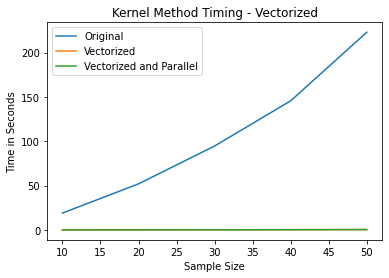

In [331]:
t = timing_rdm.plot(x='Observations',loglog=True)
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Kernel Method Timing - Vectorized")

In [16]:
import time
seed = [0,1,2,3,4]
train_size = [100, 200, 300, 400, 500, 600, 700, 800, 900]
n = len(train_size)
timing_rdmv = np.zeros((n,3))
for i in range(0,n):
    for j in seed:
        dgms = np.array(dgms_random[0:train_size[i]])
        timing_rdmv[i,0] += len(dgms)

        start = time.time()
        tdgms= reshape_to_array(dgms)
        X_train_features = guvectorize_kernel(tdgms, tdgms, .3)
        end = time.time()-start
        print(end)
        timing_rdmv[i,1] +=end
        print("Finished Vectorized")

        start = time.time()
        tdgms= reshape_to_array(dgms)
        X_train_features = guvectorize_kernel_parallel(tdgms, tdgms, .3)
        end = time.time()-start
        print(end)
        timing_rdmv[i,2] +=end
        print("Finished Parallel")

    print("Finished Training ", i)
timing_rdmv = pd.DataFrame(timing_rdmv/5)
timing_rdmv.columns=['Observations', 'Vectorized', 'Vectorized and Parallel']
print(timing_rdmv)

1.406662940979004
Finished Vectorized
0.33628320693969727
Finished Parallel
1.405393123626709
Finished Vectorized
0.33411192893981934
Finished Parallel
1.3763549327850342
Finished Vectorized
0.37796998023986816
Finished Parallel
1.3745100498199463
Finished Vectorized
0.33745527267456055
Finished Parallel
1.385796070098877
Finished Vectorized
0.3316609859466553
Finished Parallel
Finished Training  0
6.028337717056274
Finished Vectorized
1.3913798332214355
Finished Parallel
6.014202117919922
Finished Vectorized
1.420280933380127
Finished Parallel
6.033769845962524
Finished Vectorized
1.4420301914215088
Finished Parallel
6.045596122741699
Finished Vectorized
1.5307111740112305
Finished Parallel
6.068624258041382
Finished Vectorized
1.4555020332336426
Finished Parallel
Finished Training  1
13.722980737686157
Finished Vectorized
3.1458890438079834
Finished Parallel
13.718559265136719
Finished Vectorized
3.1241068840026855
Finished Parallel
13.723814010620117
Finished Vectorized
3.1574840545

Text(0.5, 1.0, 'Kernel Method Timing - Vectorized')

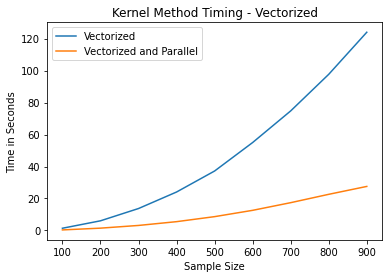

In [17]:
t = timing_rdmv.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Kernel Method Timing - Vectorized")

### Timing with 80 dgms

In [16]:
seed = [0,1,2,3,4]
train_size = [10, 20, 30, 40, 50]
n = len(train_size)
timing_80 = np.zeros((n,5))
for i in range(0,n):
    for j in seed:
        dgms = np.array(dgms_80[0:train_size[i]])
        timing_80[i,0] += len(dgms)

        start = time.time()
        X_train_features = kernel_features(dgms, s = .3)
        end = time.time()-start
        timing_80[i,1] +=end
        print("Finished Kernel")

        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(dgms)
        X_train_features = optimized_kernel_features(train, dummy_train, s = .3)
        end = time.time()-start
        timing_80[i,2] +=end
        print("Finished Jit Optimized Kernel")

        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(dgms)
        result1 = parallel_optimized_kernel_features(train, dummy_train, .3)
        end = time.time()-start
        timing_80[i,3] +=end
        print("Finished Jit Optimized and Parallel Kernel")

        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(dgms)
        X_train_features_gu = guvectorize_kernel_distance(train, dummy, .3)
        end = time.time()-start
        timing_80[i,4] +=end
        print("Finished gu vectorize")


    print("Finished Training ", i)
timing_80 = pd.DataFrame(timing_80/5)
timing_80.columns=['Observations', 'Original', 'Jit optimized', 'Jit optimized, parallel', 'Vectorized']
print(timing_80)

Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Finished gu vectorize
Finished Kernel
Finished Jit Optimized Kernel
Finished Jit Optimized and Parallel Kernel
Finished gu vectorize
Finished Training  0


KeyboardInterrupt: 

Text(0.5, 1.0, 'Kernel Method Timing - 80 dgms')

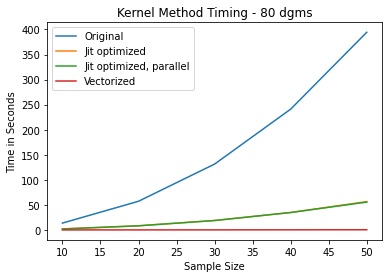

In [20]:
t = timing_80.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Kernel Method Timing - 80 dgms")

Text(0.5, 1.0, 'Kernel Method Timing - 80 dgms')

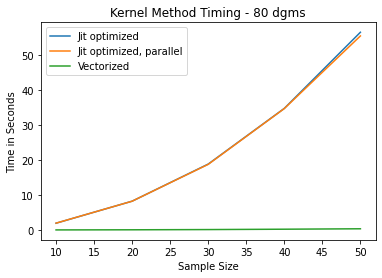

In [21]:
timingnoog = timing_80.drop(['Original'], axis=1)
t = timingnoog.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Kernel Method Timing - 80 dgms")

In [22]:
seed = [0,1,2,3,4]
train_size = [100, 200, 300, 400, 500, 600, 700]
n = len(train_size)
timing_300_vec = np.zeros((n,2))
for i in range(0,n):
    for j in seed:
        dgms = np.array(dgms_300[0:train_size[i]])
        timing_300_vec[i,0] += len(dgms)

        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(dgms)
        X_train_features_gu = guvectorize_kernel(train, dummy, .3)
        end = time.time()-start
        timing_300_vec[i,1] +=end
        print("Finished gu vectorize")

    print("Finished Training ", i)
timing_300_vec = pd.DataFrame(timing_300_vec/5)
timing_300_vec.columns=['Observations','Vectorized']
print(timing_300_vec)

Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished Training  0
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished Training  1
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished Training  2
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished Training  3
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished Training  4
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished gu vectorize
Finished Training  5


Text(0.5, 1.0, 'Vectorized - 300 dgms')

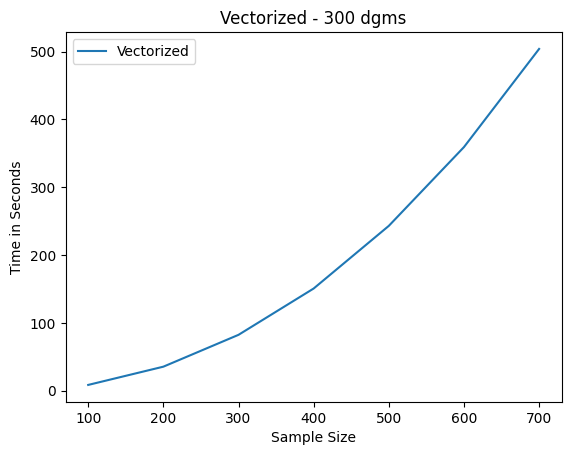

In [ ]:
t = timing_300_vec.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Vectorized - 300 dgms")

In [ ]:
seed = [0,1,2,3,4]
train_size = [100, 200, 300, 400, 500, 600, 700]
n = len(train_size)
timing_var_vec = np.zeros((n,4))
for i in range(0,n):
    for j in seed:
        dgms = np.array(dgms_10[0:train_size[i]])
        timing_var_vec[i,0] += len(dgms)

        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(dgms)
        X_train_features_gu = guvectorize_kernel(train, dummy, .3)
        end = time.time()-start
        timing_var_vec[i,1] +=end
        print("Finished 10 dgms")

        dgms = np.array(dgms_20[0:train_size[i]])
        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(dgms)
        X_train_features_gu = guvectorize_kernel(train, dummy, .3)
        end = time.time()-start
        timing_var_vec[i,2] +=end
        print("Finished 20 dgms")

        dgms = np.array(dgms_40[0:train_size[i]])
        start = time.time()
        train, dummy_train, dummy = reshape_persistence_diagrams(dgms)
        X_train_features_gu = guvectorize_kernel(train, dummy, .3)
        end = time.time()-start
        timing_var_vec[i,3] +=end
        print("Finished 20 dgms")

    print("Finished Training ", i)
timing_var_vec = pd.DataFrame(timing_var_vec/5)
timing_var_vec.columns=['Observations','10 dgms', '20 dgms', '30 dgms']
print(timing_var_vec)

Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished Training  0
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished Training  1
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished Training  2
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Finished 20 dgms
Finished 20 dgms
Finished 10 dgms
Fi

Text(0.5, 1.0, 'Vectorized - Variable dgms size')

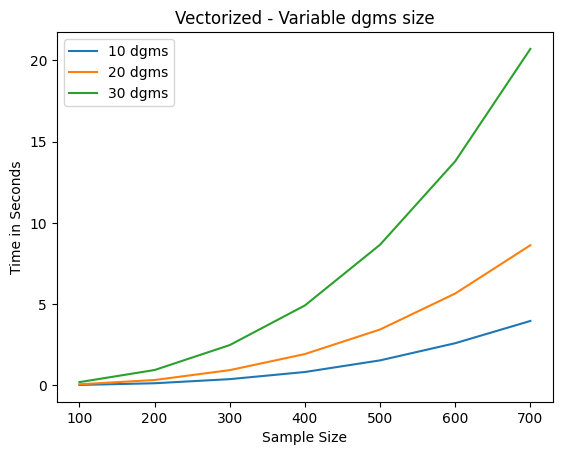

In [ ]:
t = timing_var_vec.plot(x='Observations')
t.set_xlabel("Sample Size")
t.set_ylabel("Time in Seconds")
t.set_title("Vectorized - Variable dgms size")